<a href="https://colab.research.google.com/github/joaovincosta/AulasPA/blob/main/An%C3%A1lise_de_Dados_Airbnb_NYC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Coleta de dados:**

### **Fontes de dados utilizadas:**
 - Airbnb New York City Listings (Aluguéis de curta duração em NYC): https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data

### **Importação de bibliotecas e carregamento de dados:**

In [2]:
# IMPORTAÇÃO DE BIBLIOTECAS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# CARREGAMENTO DE DADOS
df = pd.read_csv("https://raw.githubusercontent.com/joaovincosta/AulasPA/refs/heads/main/AB_NYC_2019.csv")
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### **Significado de cada coluna:**

- ***id:*** Identificador exclusivo do Airbnb para o anúncio;
- ***name:*** Nome do anúncio;
- ***host_id:*** Identificador exclusivo do Airbnb para o anfitrião/usuário;
- ***host_name:*** Nome do anfitrião. Geralmente apenas o(s) primeiro(s) nome(s);
- ***neighbourhood_group:*** Grupo de vizinhanças;
- ***neighbourhood:*** Vizinhanças, bairros;
- ***latitude:*** Usa a projeção do Sistema Geodésico Mundial (WGS84) para latitude e longitude;
- ***longitude:*** Usa a projeção do Sistema Geodésico Mundial (WGS84) para latitude e longitude;
- ***room_type:*** Todas as casas estão agrupadas nos seguintes três tipos de quartos: Lugar inteiro, Quarto privado, Quarto compartilhado;
- ***price:*** Preço diário em moeda local;
- ***minimum_nights:*** Número mínimo de noites de estadia para o anúncio;
- ***number_of_reviews:*** O número de avaliações que o anúncio tem;
- ***last_review:*** A data da última/mais recente revisão;
- ***reviews_per_month:*** O número médio de avaliações por mês que o anúncio tem durante sua vida útil;
- ***calculated_host_listings_count:*** O número de anúncio que o anfitrião possui na situação atual, na geografia da cidade/região;
- ***availability_365:*** A disponibilidade do anúncio x dias no futuro, conforme determinado pelo calendário. Um anúncio pode não estar disponível porque foi reservado por um hóspede ou bloqueado pelo anfitrião.

## **Definição de problemas:**
**1º -** A área/grupo de vizinhanças influencia na escolha dos aluguéis de curta duração em NYC?

**2º -** Quais os tipos de quarto que mais costumam serem alugados?

**3º -** Como o preço influencia no número de noites de estadia a serem pagas?

## **Inspeção de dados:**

In [4]:
# Verificando valores faltantes
df.isnull().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [5]:
# Exibindo informações gerais dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
# Exibindo estatísticas descritivas
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


## **Limpeza de dados:**

In [7]:
# Não há necessidade de realizar uma limpeza de dados, pois as colunas necessárias para a resolução dos problemas definidos não têm dados faltantes!

## **Visualização de dados:**

#### **1º Problema**: A área/grupo de vizinhanças influencia na escolha dos aluguéis de curta duração em NYC?

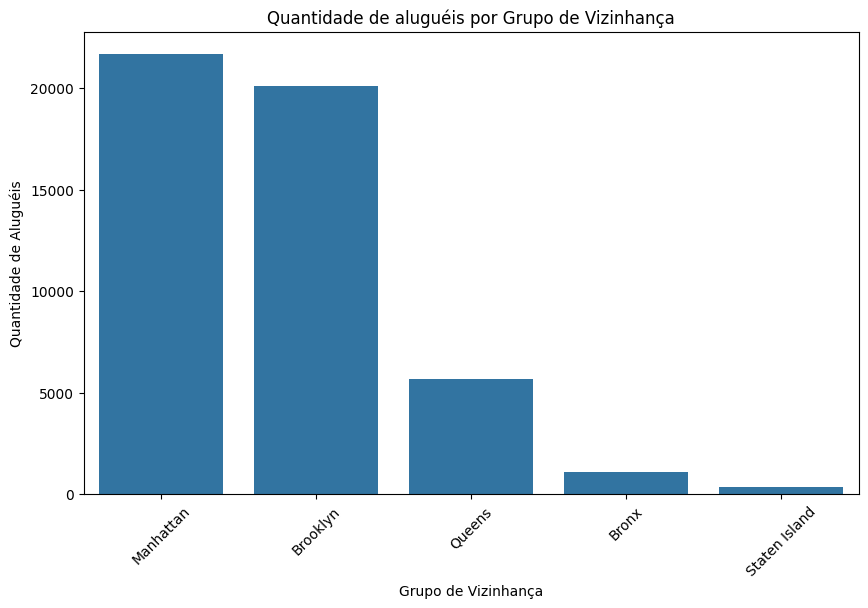

In [18]:
# Gráfico de barras para a quantidade de aluguéis por área
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='neighbourhood_group', order=df['neighbourhood_group'].value_counts().index)
plt.title('Quantidade de aluguéis por Grupo de Vizinhança')
plt.xlabel('Grupo de Vizinhança')
plt.ylabel('Quantidade de Aluguéis')
plt.xticks(rotation=45)
plt.show()

#### **2º Problema**: Quais os tipos de quarto que mais costumam serem alugados?

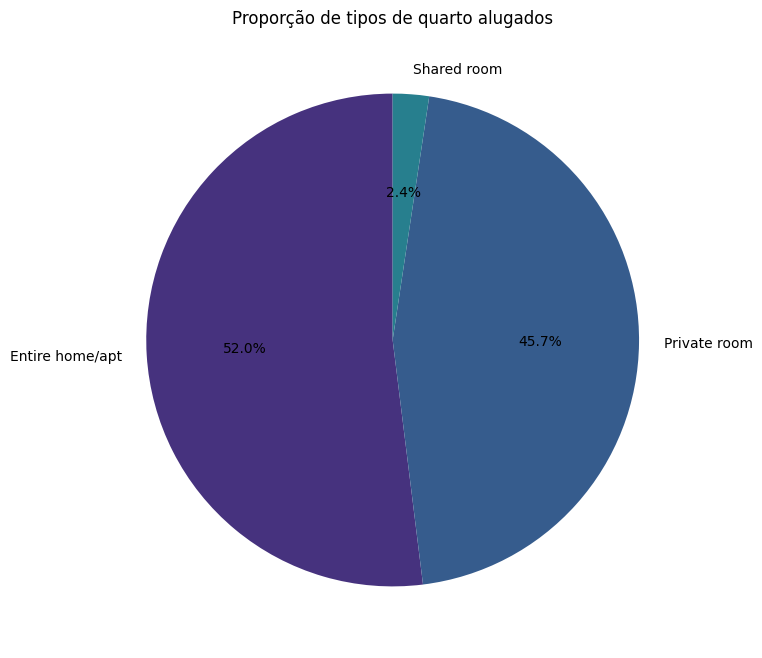

In [17]:
# Gráfico de setores para mostrar a proporção de cada tipo de quarto
room_type_counts = df['room_type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(room_type_counts, labels=room_type_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis'))
plt.title('Proporção de tipos de quarto alugados')
plt.show()

#### **3º Problema**: Como o preço influencia no número de noites de estadia a serem pagas?

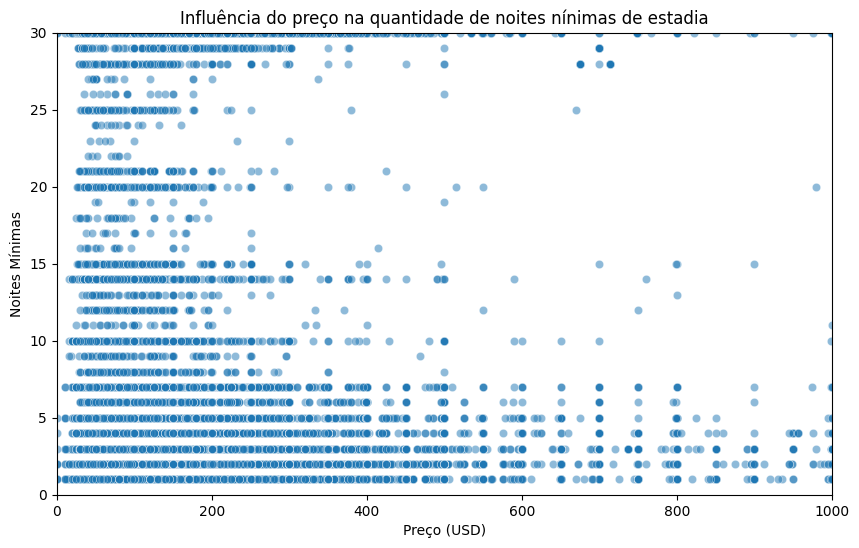

In [16]:
# Gráfico de dispersão para a relação entre preço e noites mínimas
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='price', y='minimum_nights', alpha=0.5)
plt.title('Influência do preço na quantidade de noites nínimas de estadia')
plt.xlabel('Preço (USD)')
plt.ylabel('Noites Mínimas')
plt.xlim(0, 1000)
plt.ylim(0, 30)
plt.show()

## **Conclusão:**